In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 

import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()


import sys 
sys.path.append('../code_Boyle/')
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);




# View the results from the Simulated Annealing Fitting

## load parameters from simulated annealing 

In [121]:
fit = pd.read_csv('../data/26_7_2018/fit_26_7_2018_sim_A.txt',delimiter='\t',index_col=45)
fit = fit.reset_index()

Nparams = 43
final_result = []
for param in range(1,Nparams+1):
    col = 'Parameter ' + str(param)
    final_result.append(fit[col].iloc[-1])

sa_result = np.array(final_result)

## load experimental data for comparison 

In [122]:
on_rate = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/BoyleData/DataOnRate.txt')
off_rate = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/BoyleData/DataOffRate.txt')
Pbound = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/BoyleData/DataOccupancy.txt')

## predict occupation, association rate and dissociation rate 

In [123]:
on_rate_predict = np.zeros([20,20])
off_rate_predict = np.zeros([20,20])
Pbound_predict = np.zeros([20,20])

Pbound_OT,_,_ = dCas9.calc_Boyle(True, True, True,sa_result, [])

for i in range(0,20):
    for j in range(0,20):
        mismatch_positions = [20-i, 20-j]
        if i==j:
            mismatch_positions = [20-i]
        predictions = dCas9.calc_Boyle(True, True, True,sa_result, mismatch_positions)
        Pbound_predict[i,j] = predictions[0]/Pbound_OT
        on_rate_predict[i,j] = predictions[1]
        off_rate_predict[i,j] = predictions[2]

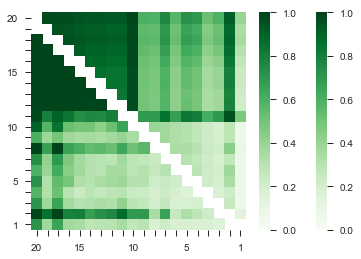

In [124]:
experiment = Pbound

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Greens',mask=mask,cbar=True,vmin=0,vmax=1);
        
    
model = Pbound_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Greens',mask=mask,cbar=True,vmin=0,vmax=1);

plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

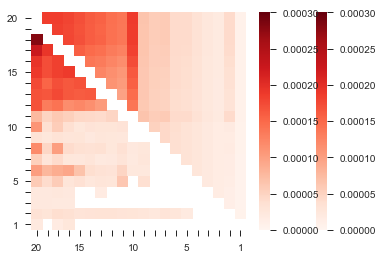

In [125]:
experiment = on_rate

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Reds',mask=mask,cbar=True,vmin=0,vmax=0.0003);
        
    
model = on_rate_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Reds',mask=mask,cbar=True,vmin=0, vmax=0.0003);

plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

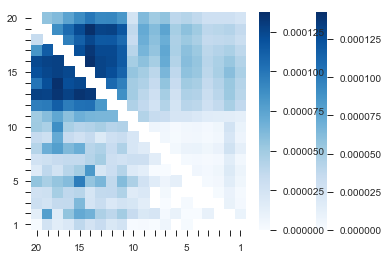

In [126]:
experiment = off_rate

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Blues',mask=mask,cbar=True,vmin=0);
        
    
model = off_rate_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Blues',mask=mask,cbar=True,vmin=0);

plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

<Container object of 20 artists>

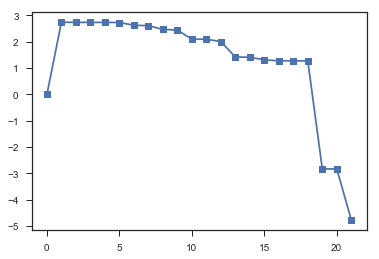

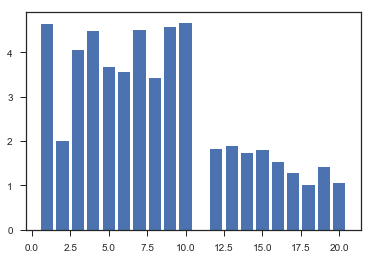

In [127]:
epsilon_C = sa_result[:21]
epsilon_C[1:] *= -1
landscape =[0.0]
for eps in epsilon_C:
    landscape.append(landscape[-1]+eps)
plt.plot(landscape, marker='s')


plt.figure()
epsilon_I = sa_result[21:-2]
plt.bar([i+1 for i in range(20)],epsilon_I)

In [120]:
sa_result[-2:]

array([ 0.31610725,  4.64965197])

,model,experiment
model,1.000000,0.860612
experiment,0.860612,1.000000


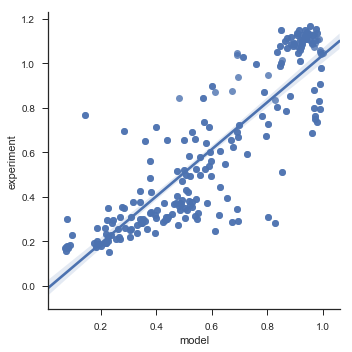

In [84]:
df = pd.DataFrame()
df['model'] = Pbound_predict.reshape((400,))
df['experiment'] = Pbound.reshape((400,))
sns.lmplot(x='model',y='experiment',data=df)
df.corr(method='pearson')

,model,experiment
model,1.000000,0.807879
experiment,0.807879,1.000000


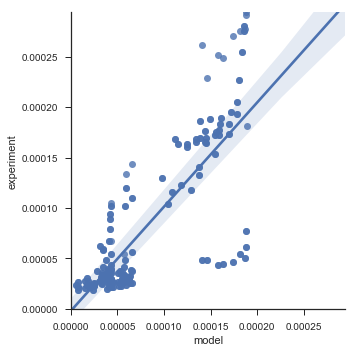

In [86]:
df = pd.DataFrame()
df['model'] = on_rate_predict.reshape((400,))
df['experiment'] = on_rate.reshape((400,))


sns.lmplot(x='model',y='experiment',data=df)
plt.ylim(0,np.max(df.experiment))
plt.xlim(0,np.max(df.experiment))
df.corr(method='pearson')

,model,experiment
model,1.000000,0.914523
experiment,0.914523,1.000000


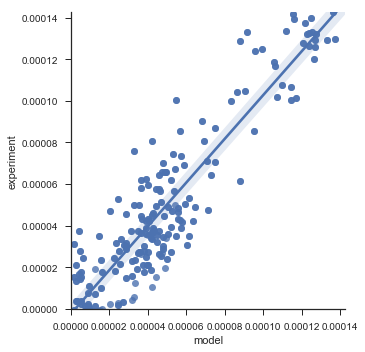

In [83]:
df = pd.DataFrame()
df['model'] = off_rate_predict.reshape((400,))
df['experiment'] = off_rate.reshape((400,))


sns.lmplot(x='model',y='experiment',data=df)
plt.ylim(0,np.max(df.experiment))
plt.xlim(0,np.max(df.experiment))
df.corr(method='pearson')

In [92]:
np.diag(Pbound_predict)

array([ 0.99372214,  0.98751944,  0.98953382,  0.98456977,  0.97837582,
        0.97070625,  0.97219697,  0.9671749 ,  0.96887185,  0.99998248,
        0.68936515,  0.68973338,  0.85206933,  0.67127023,  0.82738662,
        0.80309206,  0.61180587,  0.69331265,  0.96055691,  0.48014128])

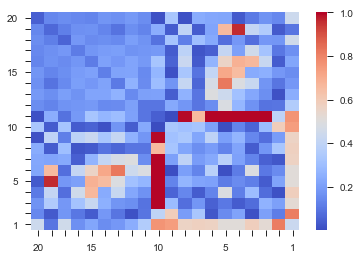

In [111]:
rel_error = np.abs(Pbound-Pbound_predict)/Pbound
sns.heatmap(rel_error,cmap='coolwarm',vmax=1.)
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

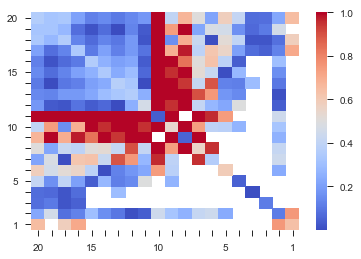

In [109]:
rel_error = np.abs(on_rate-on_rate_predict)/np.abs(on_rate)
sns.heatmap(rel_error,cmap='coolwarm', vmax=1.)
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

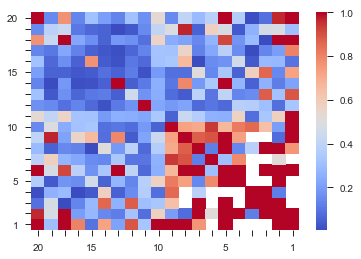

In [108]:
rel_error = np.abs(off_rate-off_rate_predict)/np.abs(off_rate)
sns.heatmap(rel_error,cmap='coolwarm',vmax=1.)
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);

In [112]:
fit 

,index,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,...,Parameter 36,Parameter 37,Parameter 38,Parameter 39,Parameter 40,Parameter 41,Parameter 42,Parameter 43,Potential,Equilibruim
0,NaN,0.001313,0.000377,0.001704,0.000231,0.005608,0.000561,0.000575,0.002065,4.673381,...,3.340840,0.469717,0.046137,0.002101,1.474846,4.498226,0.000383,57.801538,3343.535777,False
1,NaN,0.023932,0.001021,0.000814,0.013653,0.000225,4.423637,0.254776,0.001793,0.008976,...,0.144608,0.000911,0.703747,0.002382,0.000515,0.004718,0.000116,0.092224,3674.021006,False
2,NaN,0.000627,0.001050,0.038264,0.000524,0.003350,0.000205,0.000742,0.000201,0.141831,...,0.004464,0.002156,0.650164,0.937286,0.372247,0.009620,0.001011,0.155013,3426.397253,False
3,NaN,0.080304,0.001527,0.002394,0.016306,0.000733,0.003451,1.230721,0.000962,0.006423,...,3.376008,0.059774,0.018384,0.000183,0.018324,0.001970,0.000259,2.127229,3360.871843,False
4,NaN,0.000249,0.001995,0.062405,0.024705,0.003308,0.150909,2.097869,0.002905,0.004678,...,1.298068,0.077076,0.019879,0.719309,0.069611,1.741291,0.000296,0.514513,3243.768218,False
5,NaN,0.000332,0.005319,0.004529,0.001534,0.238860,0.003432,1.576280,0.001849,0.427484,...,0.153642,0.000306,0.012483,0.047458,0.195419,3.706324,0.000479,0.010506,3403.017186,False
6,NaN,0.074615,0.025661,0.000519,0.295057,0.001242,0.047233,0.111458,0.042195,0.070415,...,0.001685,0.013720,0.001018,0.685679,0.001833,0.439093,0.000641,0.009778,3309.106210,True
7,NaN,0.016557,0.000149,0.025000,0.007041,0.000621,0.101243,0.890161,0.001165,0.070078,...,0.000419,0.140155,0.000122,0.031425,0.004182,4.904899,0.000241,0.001564,3424.745710,True
8,NaN,0.052253,0.001058,0.169207,0.007609,0.000238,0.000257,0.257843,0.000196,0.001398,...,0.289118,4.705984,0.001844,0.004538,0.000371,0.251876,0.000306,0.003449,3103.696719,True
9,NaN,0.272096,0.000228,0.000752,0.000927,0.007055,0.013027,0.086953,0.002548,0.069471,...,0.044981,0.159389,1.292918,0.002407,0.587278,0.042328,0.000373,0.264837,3256.319711,True
